In [9]:
import pandas as pd
import numpy as np
import openpyxl,xlrd

In [10]:
df=pd.read_csv("/home/ameen/python/ml training/crop recommendtion system/Crop_recommendation.xls")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
Y=df.label
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [14]:
X=df.drop(["label"],axis="columns")

In [15]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB,GaussianNB
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X.values,Y,test_size=0.2,stratify=Y)

In [18]:
lr=LogisticRegression(solver="lbfgs",max_iter=8000)
lr.fit(x_train,y_train)

/home/ameen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=8000)

In [19]:
lr.score(x_test,y_test)

0.9818181818181818

Random Forest

In [20]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
rf.score(x_test,y_test)

0.9954545454545455

In [22]:
y_pred=rf.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

<Axes: >

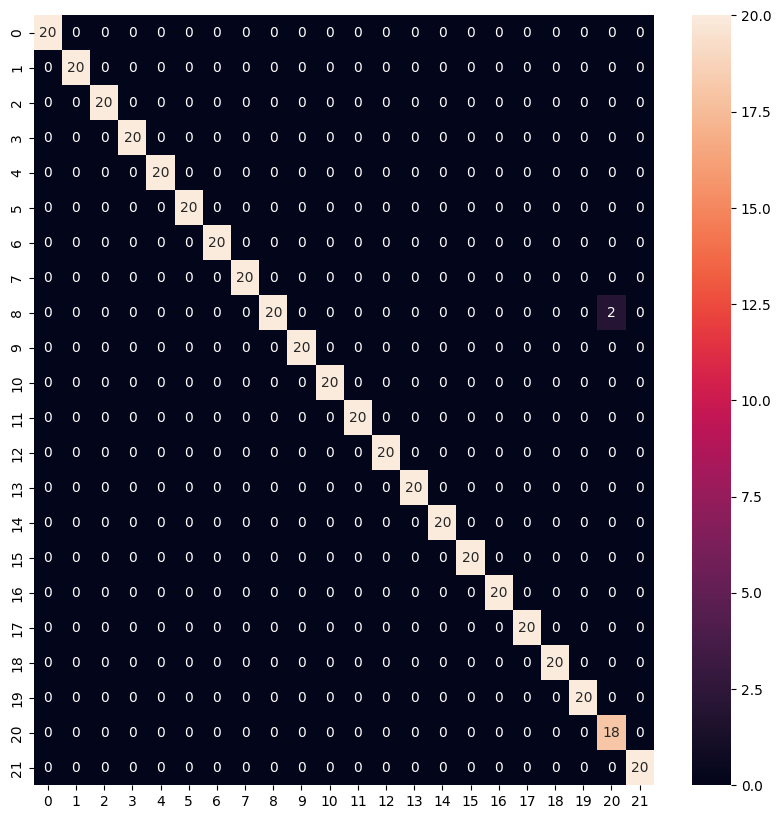

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)

In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.91      0.95        22
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [27]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [28]:
model_parameters={

    "svm":{
        "model":SVC(gamma="auto"),
        "params":{
            "C":[1,10,20],
            "kernel":["rbf","linear"]
        }
    },
    "naivebayes":{
        "model":GaussianNB(),
        "params":{
            
        }
    },
    "knn":{
        "model":KNeighborsClassifier(),
        "params":{"n_neighbors":[5,7,9],
                  "algorithm":["kd_tree","ball_tree"],
                  "leaf_size":[30,40,50]}
    },

    "random_forest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10]
        }
    },

    "logistic_regression":{
        "model":LogisticRegression(solver="liblinear",multi_class="auto"),
        "params":{
            "C":[1,5,10]
        }
    }
}

In [29]:
scores=[]
for model_name,mp in model_parameters.items():
    clf=RandomizedSearchCV(mp["model"],mp["params"],cv=5,n_iter=3,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        "model":model_name,
        "best_score":clf.best_score_,
        "best_parameter":clf.best_params_
    })

/home/ameen/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [30]:
df_scores=pd.DataFrame(scores)
df_scores

,model,best_score,best_parameter
0,svm,0.985227,"{'kernel': 'linear', 'C': 10}"
1,naivebayes,0.994318,{}
2,knn,0.977273,"{'n_neighbors': 5, 'leaf_size': 40, 'algorithm..."
3,random_forest,0.990909,{'n_estimators': 10}
4,logistic_regression,0.959659,{'C': 10}


In [31]:
def predict_crop(x_realdata):
    result=rf.predict([x_realdata])
    
    return result

In [32]:
predict_crop([90,42,43,20.879744,75,5.5,220])


array(['rice'], dtype=object)

Naives Bayes

In [33]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [34]:
nb.score(x_test,y_test)

0.9954545454545455

In [35]:
y_pred_nb=nb.predict(x_test)

In [36]:
cm_nb=confusion_matrix(y_pred_nb,y_test)

<Axes: >

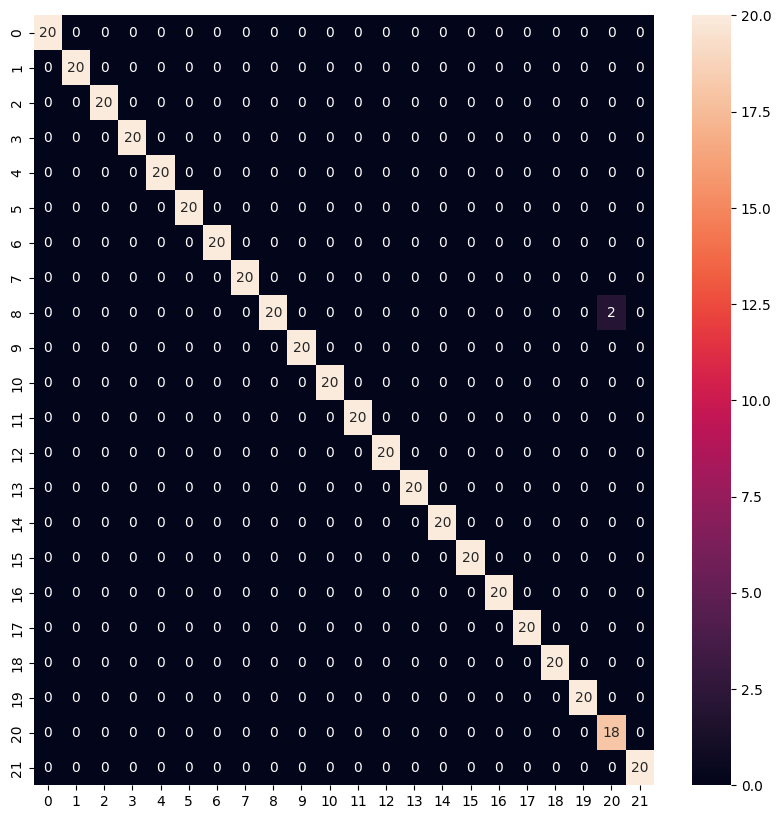

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sn.heatmap(cm_nb,annot=True)

In [38]:
nb.predict(x_test[:10])

array(['grapes', 'muskmelon', 'chickpea', 'chickpea', 'mungbean', 'rice',
       'blackgram', 'watermelon', 'blackgram', 'jute'], dtype='<U11')

In [39]:
y_test[:10]

1223        grapes
1452     muskmelon
254       chickpea
295       chickpea
653       mungbean
70            rice
791      blackgram
1382    watermelon
710      blackgram
45            rice
Name: label, dtype: object

In [40]:
def predict_crop(x_realdata):
    result=rf.predict([x_realdata])
    
    return result

In [41]:
predict_crop([90,42,43,20.879744,75,5.5,220])


array(['rice'], dtype=object)

SVM

In [42]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [43]:
svm.score(x_test,y_test)

0.9795454545454545

Saving The Model

In [44]:
import pickle

In [45]:
with open("crop_model.pkl","wb") as f:
    pickle.dump(rf,f)


In [46]:
with open("/home/ameen/python/ml training/crop recommendtion system/crop_model.pkl","rb") as f1:
    model=pickle.load(f1)

In [49]:
model.predict([[50,42,30,67,75,5.5,220]])

array(['coconut'], dtype=object)